In [1]:
import neptune as neptune
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mticker

from misc import get_neptune_table, get_activations, plot_module, get_steps_from_first_run, pivot_dict, plot_loss_vs_lr

In [2]:
tags = ['muP_MoE', 'test_grid']

df = get_neptune_table(tags)
print(df.shape)

https://app.neptune.ai/pmtest/llm-random/
Table downloaded
Shape: (5, 248)
(5, 248)


In [3]:
act_dict = get_activations(df, 'mean')
print(act_dict)

run ID: LLMRANDOM-22837
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-22837
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-22836
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-22836
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-22835
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-22835
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-22834
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-22834
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
run ID: LLMRANDOM-22833
https://app.neptune.ai/pmtest/llm-random/e/LLMRANDOM-22833
run keys
<Namespace field at "block_0/residual_attention">
n_blocks: 4
{'LLMRANDOM-22837': {'dmodel': 128, 0: {'attn':       step     value               timestamp
0      0.0  0.208008 2024-11-24 16:34:37.413
1    100.0  0.462891 2024-11-24 16:34:45.798
2    200.0  0.550781 2024-11-24 16:34:54.134
3 

In [4]:
steps = get_steps_from_first_run(act_dict)
layer_num = 3
module='FF'
pivoted_dict = pivot_dict(
    activations_dict=act_dict,
    steps=steps,
    dmodels=[32, 64, 128, 256, 512],
    layer_num=layer_num,
    module=module,
)

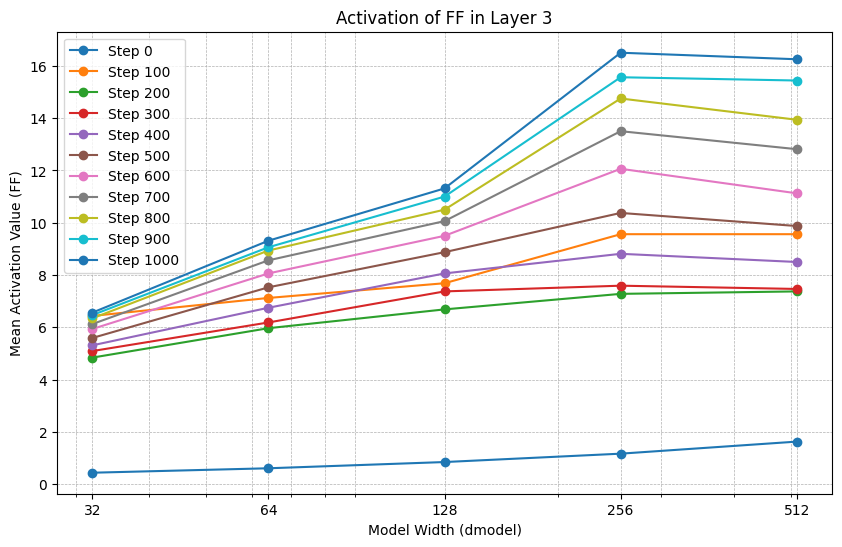

In [5]:
plot_module(
    pivoted_dict=pivoted_dict,
    module_keyword=module,
    layer_num=layer_num,
)

loss: 6.323125
loss: 5.613125
loss: 5.9871875
loss: 6.5275
loss: 6.7334375


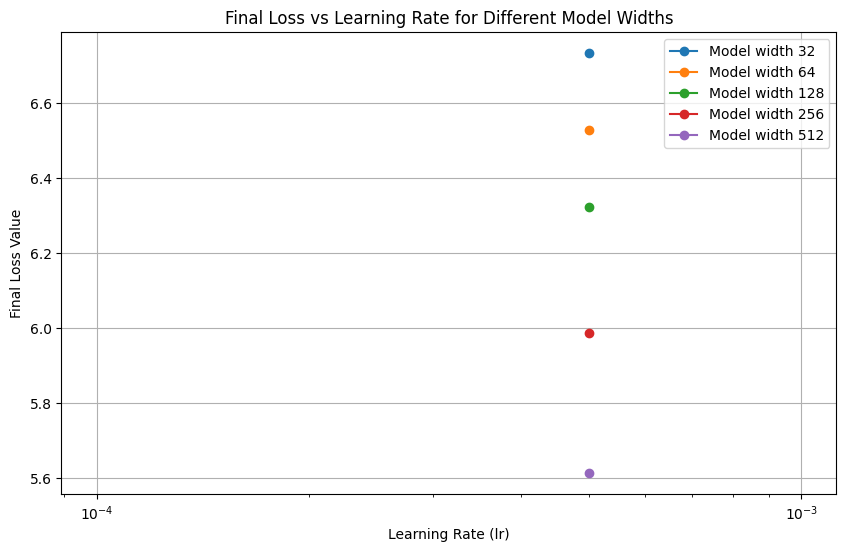

In [6]:
plot_loss_vs_lr(df)